In [50]:
import numpy as np 

In [51]:
import pandas as pd 

In [52]:
import matplotlib.pyplot as plt

In [53]:
image_dir = "putin.jpeg"

In [54]:
img = plt.imread(image_dir)

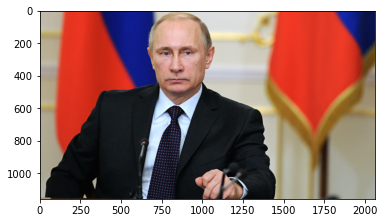

In [55]:
plt.imshow(img)

In [56]:
new_image = img.copy()

In [57]:
new_image.shape

(1158, 2060, 3)

In [78]:
hidden_message = "So then I can change this to be whatever I want it to be and then it should work. Lovely"

In [79]:
hidden_message += '¬'

In [80]:
binary_converted = ' '.join(format(ord(c), 'b') for c in hidden_message)
print("The Binary Representation is:", binary_converted)

The Binary Representation is: 1010011 1101111 100000 1110100 1101000 1100101 1101110 100000 1001001 100000 1100011 1100001 1101110 100000 1100011 1101000 1100001 1101110 1100111 1100101 100000 1110100 1101000 1101001 1110011 100000 1110100 1101111 100000 1100010 1100101 100000 1110111 1101000 1100001 1110100 1100101 1110110 1100101 1110010 100000 1001001 100000 1110111 1100001 1101110 1110100 100000 1101001 1110100 100000 1110100 1101111 100000 1100010 1100101 100000 1100001 1101110 1100100 100000 1110100 1101000 1100101 1101110 100000 1101001 1110100 100000 1110011 1101000 1101111 1110101 1101100 1100100 100000 1110111 1101111 1110010 1101011 11100101


In [81]:
ascii_values = binary_converted.split(' ')
ascii_values = [ascii_val.zfill(8) for ascii_val in ascii_values ]

In [82]:
ascii_string = "".join(ascii_values)

In [83]:
ascii_string

'010100110110111100100000011101000110100001100101011011100010000001001001001000000110001101100001011011100010000001100011011010000110000101101110011001110110010100100000011101000110100001101001011100110010000001110100011011110010000001100010011001010010000001110111011010000110000101110100011001010111011001100101011100100010000001001001001000000111011101100001011011100111010000100000011010010111010000100000011101000110111100100000011000100110010100100000011000010110111001100100001000000111010001101000011001010110111000100000011010010111010000100000011100110110100001101111011101010110110001100100001000000111011101101111011100100110101111100101'

In [84]:
bin(int(ascii_values[0],2))

'0b1010011'

In [85]:
# ' ' -> 100000
# '.' -> 101110
# '!' -> 100001

In [86]:
bin(int('1', 2) + int(ascii_values[0], 2))

'0b1010100'

In [87]:
r = new_image[:, :, 0].shape
r

(1158, 2060)

In [88]:
print(len(ascii_values))
print(len(ascii_string))

81
648


In [89]:
row = len(new_image)
col = len(new_image[0])
print(row, col)

1158 2060


In [90]:

def change_image(new_image):
    counter = 0
    for colours in range(3):
        for row in range(len(new_image)):
            for col in range(len(new_image[0])):
                older = new_image[row][col][colours] 
                #new_val = (older + int(ascii_string[counter]))%255
                #new_image[row][col][0] = new_val
                #print("ASCII POSITION:::", ascii_string[counter], counter)
                older_val = new_image[row][col][colours]
                #print('OLDER :::', older)
                bin_older = bin(older)
                #print('OLDER BINARY:::', bin_older)
                temp_bin_older = [s for s in bin_older]

                temp_bin_older[-1] = ascii_string[counter]

                new_bin = ''.join(temp_bin_older)
                new_number = int(new_bin, 2)
                new_image[row][col][colours] = new_number
                #print('NEW NUMBER::::', new_number)
                #new_number = 
                counter += 1
                if counter == len(ascii_string):
                    return new_image

            

In [91]:
encoded_image = change_image(new_image)

In [92]:
# number = 189
# print(bin(number))
# int(bin(int('1', 2) + int(bin(number), 2)),2)

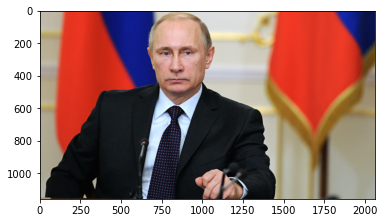

In [93]:
plt.imshow(encoded_image)

In [102]:
            
def get_final_message(decoded_message):
    message = ""
    for i in range(0, len(decoded_message), 8):
        #if chr(int(decoded_message[i:i+8], 2)) == '¬':
        #    return message
        message += chr(int(decoded_message[i:i+8], 2))
    return message

In [127]:
def find_message_from_image(enc_image):
    final_message = ""
    message = ""
    jumper = 1 
    counter = 0
    for colr in range(3):
        for row in range(len(enc_image)):
            for col in range(len(enc_image[0])):
                bin_ = bin(enc_image[row][col][colr])[-1]
                message += bin_
                checker = jumper * 8
                if len(message) % checker == 0:
                    if (chr(int(message[-8:],2))) == '¬':
                        return final_message
                    final_message += (chr(int(message[-8:],2)))
                    print((chr(int(message[-8:],2))))
    



In [128]:
decoded_message = find_message_from_image(encoded_image)

S
o
 
t
h
e
n
 
I
 
c
a
n
 
c
h
a
n
g
e
 
t
h
i
s
 
t
o
 
b
e
 
w
h
a
t
e
v
e
r
 
I
 
w
a
n
t
 
i
t
 
t
o
 
b
e
 
a
n
d
 
t
h
e
n
 
i
t
 
s
h
o
u
l
d
 
w
o
r
k
å

s



a

P
&
s

c
Ç
;
0
 
á
é
¼
ÿ

«


b

ª

¡
c
×
M
â


9
j
³
â

´
°

ô

Ù
5
¿
!
D
!
Y




Û
I
·
b
¯

«
?

³

Z
x
¯
±

þ


û
_
ë
´


^
D

C
À
á

ý
{
Ó
_
K
0
Ø
Ú
r
L

K
n
¯
k
Ñ
B
V
s

 
Ç
×
A
@
ñ
¾

_
i
×

s


t
³
X
J

 
`
	
§


À

U

e
ë
]

û

Å
÷
F
g
Ý

Å
?
L
u
Ê
c
º


c
(

¹
 
ø
J
$
!
a
ê
Ò
»
¤
ä

?
,
Ö
·


,
¿
B
Ø
c
G
Ö
-
X
@
À

*
5
Â
y
]
!
F
ê

[
Â

b
Õ
4
N

­
6

&
ï
Ñ
§
±
I
Ó
7
K
.
©
½


ó
h
÷
@
õ
H

(
R
î
£

à
¹

÷
M
Ñ
m
Ì
Ï
ó
M
;
³
V
Z
c
¨
d

À


¹
5

;
Ì
F
#
x
$
5
)
H

¨
²
_

ÿ
T

þ
|

V

!
¹
÷

¦
î
î
»
Ù
3
æ
@
R
ª

ý
Þ
ë


H
¤
}
B
¹

E
|
@

þ
x
v

q



In [129]:
print(decoded_message)

^DCÀáý{Ó_K0ØÚrLKn¯kÑBVs Ç×A@ñ¾_i×st³XJ `	§ÀUeë]ûÅ÷FgÝÅ?LuÊcºc(¹ øJ$!aêÒ»¤ä?,Ö·,¿BØcGÖ-X@À*5Ây]!Fê[ÂbÕ4N­6&ïÑ§±IÓ7K.©½óh÷@õH(Rî£à¹÷MÑmÌÏóM;³VZc¨dÀ
¹5;ÌF#x$5)H¨²_ÿTþ|V!¹÷¦îî»Ù3æ@RªýÞëH¤}B¹E|@þxvq
